# Data Programming Project: Vehicle Insurance Prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.io.parsers.read_csv("D:/GSU/Data Programming/train.csv")
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [7]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


Here, we are filtering out the numerical data from the whole dara set. So in total we have around 9 numerical variables.

In [8]:
print(data.select_dtypes(include = np.number).shape)
data.select_dtypes(include = np.number)

(381109, 9)


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,40454,26,217,1
1,2,76,1,3,0,33536,26,183,0
2,3,47,1,28,0,38294,26,27,1
3,4,21,1,11,1,28619,152,203,0
4,5,29,1,41,1,27496,152,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26,1,30170,26,88,0
381105,381106,30,1,37,1,40016,152,131,0
381106,381107,21,1,30,1,35118,160,161,0
381107,381108,68,1,14,0,44617,124,74,0


In [9]:
print(data.select_dtypes(include = object).shape)
data.select_dtypes(include = object)

(381109, 3)


,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


# Data Cleaning

Here we are looking for the missing / null values in the data set

In [10]:
print('Row counts:', data.shape[0], '\nColumn counts:', data.shape[1], '\n')
data.head()

Row counts: 381109 
Column counts: 12 



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [12]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Dataset is clean from missing values

### Removing duplicate rows

In [13]:
print('Any duplicated rows?')
print('No') if data.duplicated().values.any() == False else print('Yes')

Any duplicated rows?
No


# Visualization of data

In [14]:
features_num2 = list(data.select_dtypes(include = np.number).drop(columns = ['id', 'Response','Driving_License','Previously_Insured','Policy_Sales_Channel','Region_Code'], axis = 1).columns)

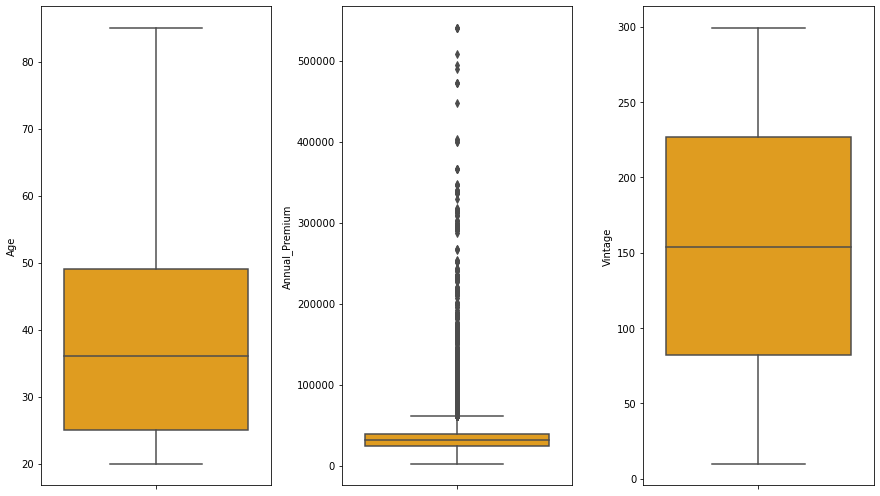

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20.7, 7))
for i in range(0, len(features_num2)):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(
        y = data[features_num2[i]],
        color = 'orange'
    )

plt.tight_layout()

### Plot on Driving_License and Previously_Insured

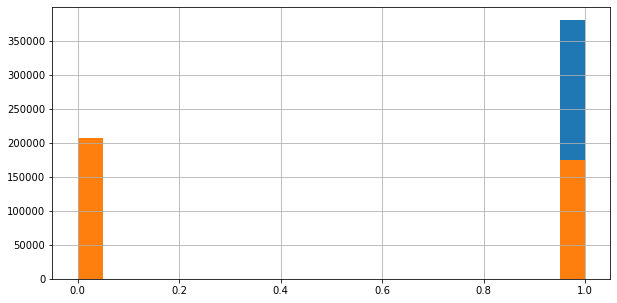

In [16]:
import matplotlib.pyplot as plt
data['Driving_License'].hist(bins= 20, figsize= (10,5))
data['Previously_Insured'].hist(bins= 20, figsize= (10,5))
plt.show()

In [17]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

## Non-Numerical Data

In [18]:
features_cat = list(data.select_dtypes(include = object).columns)
print('Lenghth: ', len(features_cat))
features_cat

Lenghth:  3


['Gender', 'Vehicle_Age', 'Vehicle_Damage']

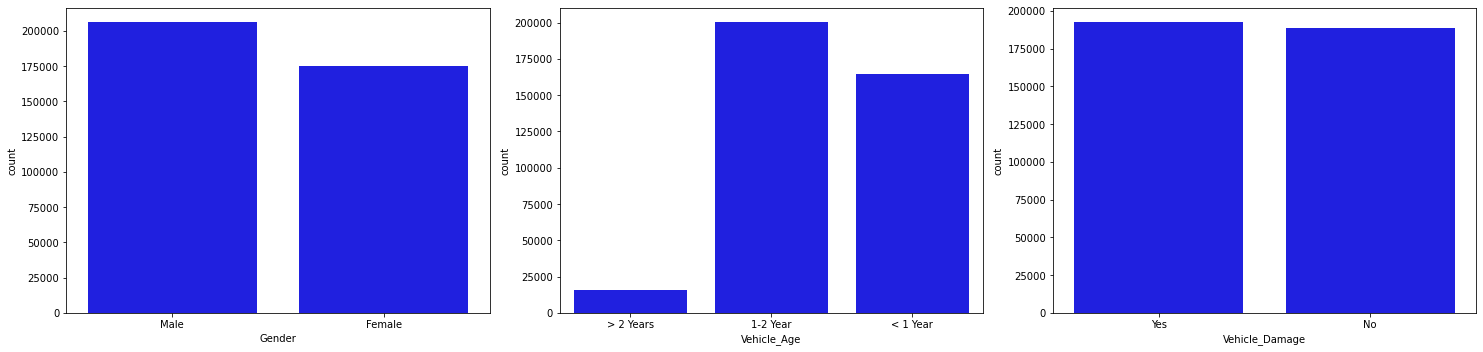

In [19]:
plt.figure(figsize = (20.7, 5))

for i in range(0, len(features_cat)):
    plt.subplot(1, 3, i + 1)
    sns.countplot(
        x = data[features_cat[i]],
        color = 'blue'
    )

plt.tight_layout()

### We can see that only around 12.3 % of people were interested in taking vehicle insurance

Text(0.5, 1.0, 'Target variable count')

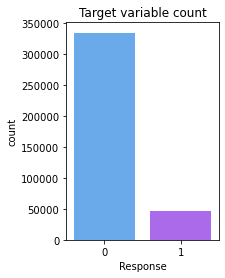

In [20]:
plt.subplot(1,2,1)
sns.countplot(data['Response'],palette = 'cool')
plt.title("Target variable count")

In [21]:
print( "Percentage of target class\n")
print(data['Response'].value_counts()/len(data)*100)

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


# HeatMap

In [22]:
from sklearn.preprocessing import OrdinalEncoder

C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

print(CategoricalVariables)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [23]:
car_insur = data.drop(['id','Response'], axis=1)

In [24]:
enc = OrdinalEncoder()
data[["Gender","Vehicle_Damage"]] = enc.fit_transform(data[["Gender","Vehicle_Damage"]])
data.loc[data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
data.loc[data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
data.loc[data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
data['Vehicle_Age']=data['Vehicle_Age'].astype(float)

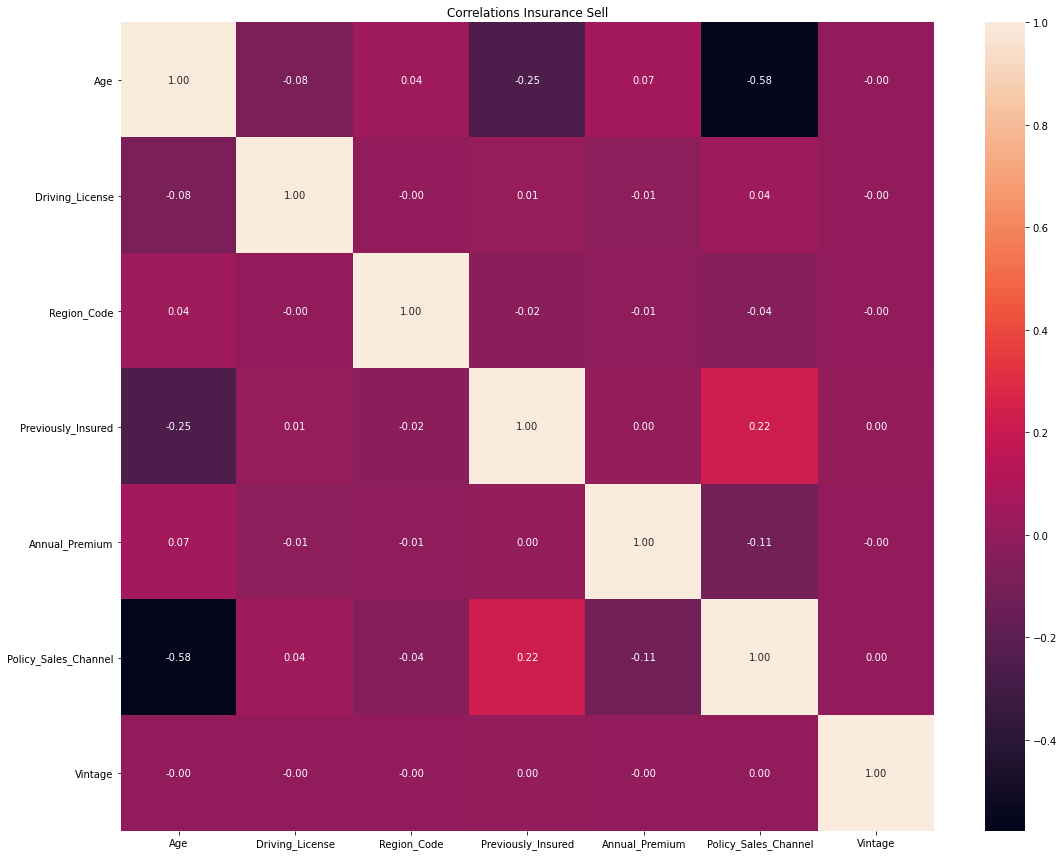

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
ax = sns.heatmap(car_insur.corr(), annot=True, fmt='.2f')
ax.set_title('Correlations Insurance Sell')
plt.tight_layout()

## Using the heatmap we find the following correlations between attributes

- The age of the person is strongly correlated with the age of the car because young people often drive new cars.
- The age with the sales channel is negatively coorelated because young people usually hire online and the elderly through other channels.
- There is also a strong negative coorelation between Vehicle Damage and Previously Insured Vehicles  

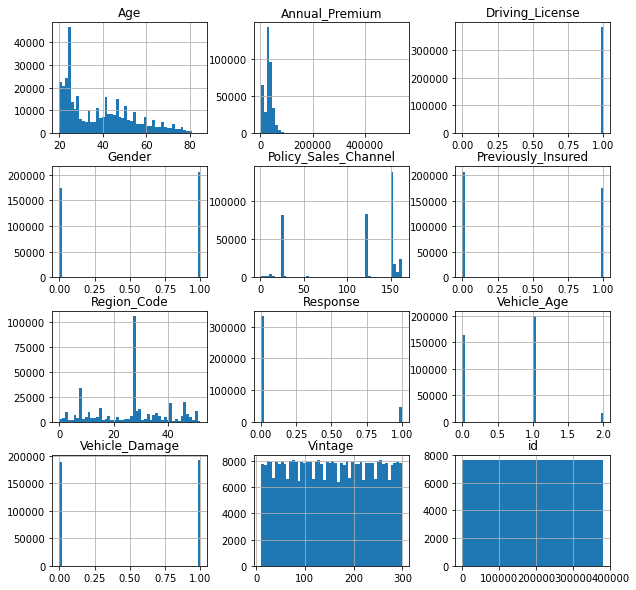

In [27]:
%matplotlib inline
data.hist(bins= 50, figsize= (10,10))
plt.show()

## Using the variable data distribution we get the following inference 

- We can conculde that the age of the customers is more skewed towards the younger age group
- The annual premium also is more towards the lesser premiums indicating that the target customers prefer lesser premiums 

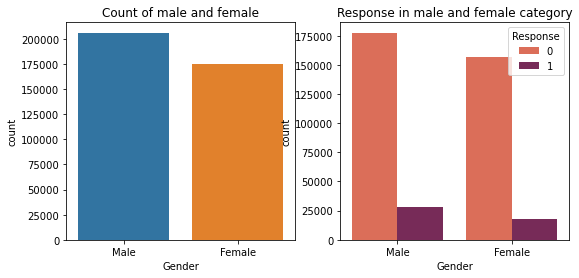

In [29]:
car_train = pd.io.parsers.read_csv("D:/GSU/Data Programming/train.csv")
car_train2 = car_train.drop(['id'], axis=1)
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(car_train2['Gender'])
plt.title("Count of male and female")



plt.subplot(1,2,2)
sns.countplot(car_train2['Gender'], hue= car_train2['Response'], palette= "rocket_r")
plt.title("Response in male and female category")
plt.show()

- We can infer from the above charts that the count of male customers is more than the female and the ratio of not taking a vehicle loan to taking a loan is same across both the genders.

# Decision Tree

In [30]:
train = pd.io.parsers.read_csv("D:/GSU/Data Programming/train.csv")


In [31]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [32]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [33]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [34]:
train=pd.get_dummies(train,drop_first=True)

In [35]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28,0,40454,26,217,1,0,1,1
1,2,1,76,1,3,0,33536,26,183,0,0,0,0
2,3,1,47,1,28,0,38294,26,27,1,0,1,1
3,4,1,21,1,11,1,28619,152,203,0,1,0,0
4,5,0,29,1,41,1,27496,152,39,0,1,0,0


### Renaming the column name

In [36]:
train = train.rename(columns ={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1 Year", "Vehicle_Age_> 2 Years" : "Vehicle_Age_gt_ 2 Years"})

In [37]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28,0,40454,26,217,1,0,1,1
1,2,1,76,1,3,0,33536,26,183,0,0,0,0
2,3,1,47,1,28,0,38294,26,27,1,0,1,1
3,4,1,21,1,11,1,28619,152,203,0,1,0,0
4,5,0,29,1,41,1,27496,152,39,0,1,0,0


In [38]:
num_feat = ['Age','Vintage']

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Apply Standardscaler for Age and Vintage
ss = StandardScaler()
train[num_feat]= ss.fit_transform(train[num_feat])

#Apply minmaxscaler for annual premium
mm=MinMaxScaler()
train['Annual_Premium']= mm.fit_transform(train[['Annual_Premium']])

In [40]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,0.333777,1,28,0,0.070366,26,0.748795,1,0,1,1
1,2,1,2.396751,1,3,0,0.057496,26,0.342443,0,0,0,0
2,3,1,0.527181,1,28,0,0.066347,26,-1.521998,1,0,1,1
3,4,1,-1.148985,1,11,1,0.048348,152,0.581474,0,1,0,0
4,5,0,-0.633242,1,41,1,0.046259,152,-1.378580,0,1,0,0


### Splitting training and testing data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_target=train['Response']
train=train.drop(['Response'], axis = 1)
train=train.drop(['id'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)



In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train,train_target, test_size=0.3, random_state= 124)

In [47]:
print(X_train.shape, X_test.shape)

(266776, 11) (114333, 11)


In [48]:
model= DecisionTreeClassifier()

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
prediction = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print (confusion_matrix(y_test, prediction))

[[89904 10321]
 [ 9696  4412]]


In [53]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100225
           1       0.30      0.31      0.31     14108

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.83    114333



## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model
print (X_test.columns)

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1 Year', 'Vehicle_Age_gt_ 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')


In [55]:
model.fit (X_train, y_train)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
prediction = model.predict(X_test)

In [57]:
prediction

prob1=model.predict_proba(X_test)[:,1]
lr_coef =model.coef_
print(model.coef_, model.intercept_)



[[ 1.15031354e-01 -3.85097819e-01 -6.78815344e-01 -1.99385790e-03
  -4.06488297e+00  1.62275389e-01 -2.80015316e-03  1.87455175e-02
  -1.18323395e+00  1.73452448e-01  1.94929649e+00]] [-1.78109273]


In [58]:
from sklearn.metrics import classification_report

In [61]:
lr = model 
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       0.00      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



## Gaussian Naive Bayes

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [64]:
y_pred_nb = nb_model.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred_nb)

0.703471438692241

In [66]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    100225
           1       0.28      0.91      0.43     14108

    accuracy                           0.70    114333
   macro avg       0.63      0.79      0.62    114333
weighted avg       0.90      0.70      0.75    114333



## Random Forest Classifier

In [67]:
from sklearn.ensemble.forest import RandomForestClassifier

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [70]:
rf_model = RandomForestClassifier(n_estimators =150)

In [72]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [73]:
rf_prediction = rf_model.predict(X_test)
rf_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    100225
           1       0.37      0.12      0.18     14108

    accuracy                           0.87    114333
   macro avg       0.63      0.54      0.55    114333
weighted avg       0.82      0.87      0.83    114333



In [75]:
y_test.value_counts()

0    100225
1     14108
Name: Response, dtype: int64

In [76]:
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))


In [77]:
w = np.array(lr_coef).transpose()
y_pred = lr.predict_proba(X_test)[:, 1]
mcfadden_rsquare(w, X_test, y_pred)

0.3750285021037615

In [78]:
lr_coef

array([[ 1.15031354e-01, -3.85097819e-01, -6.78815344e-01,
        -1.99385790e-03, -4.06488297e+00,  1.62275389e-01,
        -2.80015316e-03,  1.87455175e-02, -1.18323395e+00,
         1.73452448e-01,  1.94929649e+00]])

In [79]:
X_test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1 Year', 'Vehicle_Age_gt_ 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [80]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8361927815802593